# fastSTRUCTURE summary
fastSTRUCTURE was performed on a range of k 1-9

In [2]:
library(ggplot2)
library(tidyr)
library(data.table)
options(repr.plot.width=15, repr.plot.height=6)

## Likelihood stats

In [3]:
fs.stats <- read.table("bft.kinless.fs.summary", header = T)
fs.stats$k <- as.character(fs.stats$k)
head(fs.stats)

,k,likelihood
,<chr>,<dbl>
1,1,-0.3247304
2,2,-0.3268756
3,4,-0.3446892
4,3,-0.3395215
5,5,-0.3487571
6,7,-0.3473657


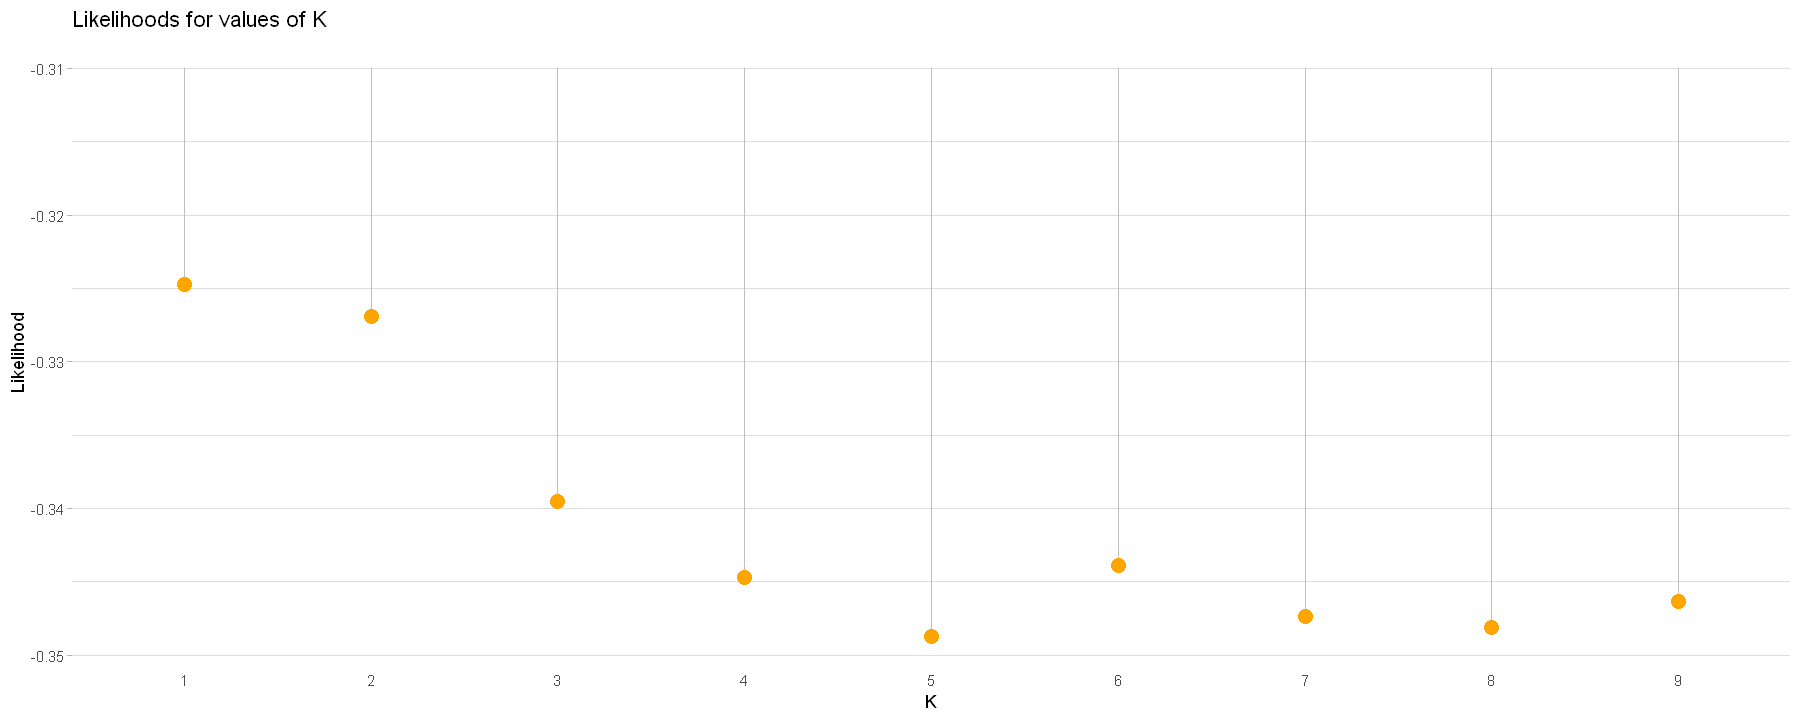

In [4]:
ggplot(fs.stats, aes(x = k, y = likelihood)) +
    geom_segment( aes(x= k, xend= k, y=-0.31, yend=likelihood), color="grey") +
    geom_point(color = "orange", size = 4) +
    theme_light() +
    labs(title = "Likelihoods for values of K") +
    xlab("K") +
    ylab("Likelihood") +
    theme(
    panel.grid.major.x = element_blank(),
    panel.border = element_blank(),
    axis.ticks.x = element_blank()
  ) 

In [5]:
ggsave("faststructure.2-9.likelihoods.png", height = 7, width = 14, units = "in")

Pattern match to find output files from their respective folders

In [6]:
infiles <- list.files(pattern = "[1-9]?.meanQ", recursive = T)
infiles

[1] "k1/bft.kinless_out.1.meanQ" "k2/bft.kinless_out.2.meanQ"
[3] "k3/bft.kinless_out.3.meanQ" "k4/bft.kinless_out.4.meanQ"
[5] "k5/bft.kinless_out.5.meanQ" "k6/bft.kinless_out.6.meanQ"
[7] "k7/bft.kinless_out.7.meanQ" "k8/bft.kinless_out.8.meanQ"
[9] "k9/bft.kinless_out.9.meanQ"

Load in metadata to get sample names and population names

In [7]:
metadata <- read.csv("../inputfiles/bft.strata", header = T)[c(1,2,5,6)]
names(metadata) <- c("name", "year","region","population")
head(metadata)

,name,year,region,population
,<chr>,<int>,<chr>,<chr>
1,BRZ_1261,2016,BRZ,BRZ
2,BRZ_1269,2016,BRZ,BRZ
3,BRZ_1270,2016,BRZ,BRZ
4,BRZ_1271,2016,BRZ,BRZ
5,BRZ_1275,2016,BRZ,BRZ
6,BRZ_1276,2016,BRZ,BRZ


Load in all the q values

In [8]:
qscores <- lapply(infiles,fread)

Instantiate empty DF to convert to long-format table

In [9]:
fstruct.res <- data.frame(
    matrix(vector(), 0, 4,
    dimnames=list(c(), c("k", "sample", "population", "value"))),
    stringsAsFactors=TRUE
)

In [10]:
for (i in 1:length(qscores)){
    # drop the "V" in the columns names
    colnames(qscores[[i]]) <- gsub("^[V]", "", colnames(qscores[[i]]))
    # add a K column
    qscores[[i]]$k <- as.factor(length(colnames(qscores[[i]])))
    # add sample/population names column
    qscores[[i]]$sample <- metadata$name
    qscores[[i]]$origin <- metadata$population
    qscores[[i]]$year <- metadata$year
    qscores[[i]]$region <- metadata$region
    # wide-to-long format & append
    fstruct.res <- rbind(
        fstruct.res,
        pivot_longer(qscores[[i]], cols = !c(k, sample, origin, year, region), names_to = "population")    
    ) 
}

In [11]:
colors <- RColorBrewer::brewer.pal(n=9, "Set3")

In [12]:
fstruct.res <- fstruct.res[fstruct.res$k != 1,]
fstruct.res$k <- paste0("K: ", fstruct.res$k)
head(fstruct.res)

k,sample,origin,year,region,population,value
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
K: 2,BRZ_1261,BRZ,2016,BRZ,1,0.999813
K: 2,BRZ_1261,BRZ,2016,BRZ,2,0.000187
K: 2,BRZ_1269,BRZ,2016,BRZ,1,0.999829
K: 2,BRZ_1269,BRZ,2016,BRZ,2,0.000171
K: 2,BRZ_1270,BRZ,2016,BRZ,1,0.999838
K: 2,BRZ_1270,BRZ,2016,BRZ,2,0.000162


## Plot by location

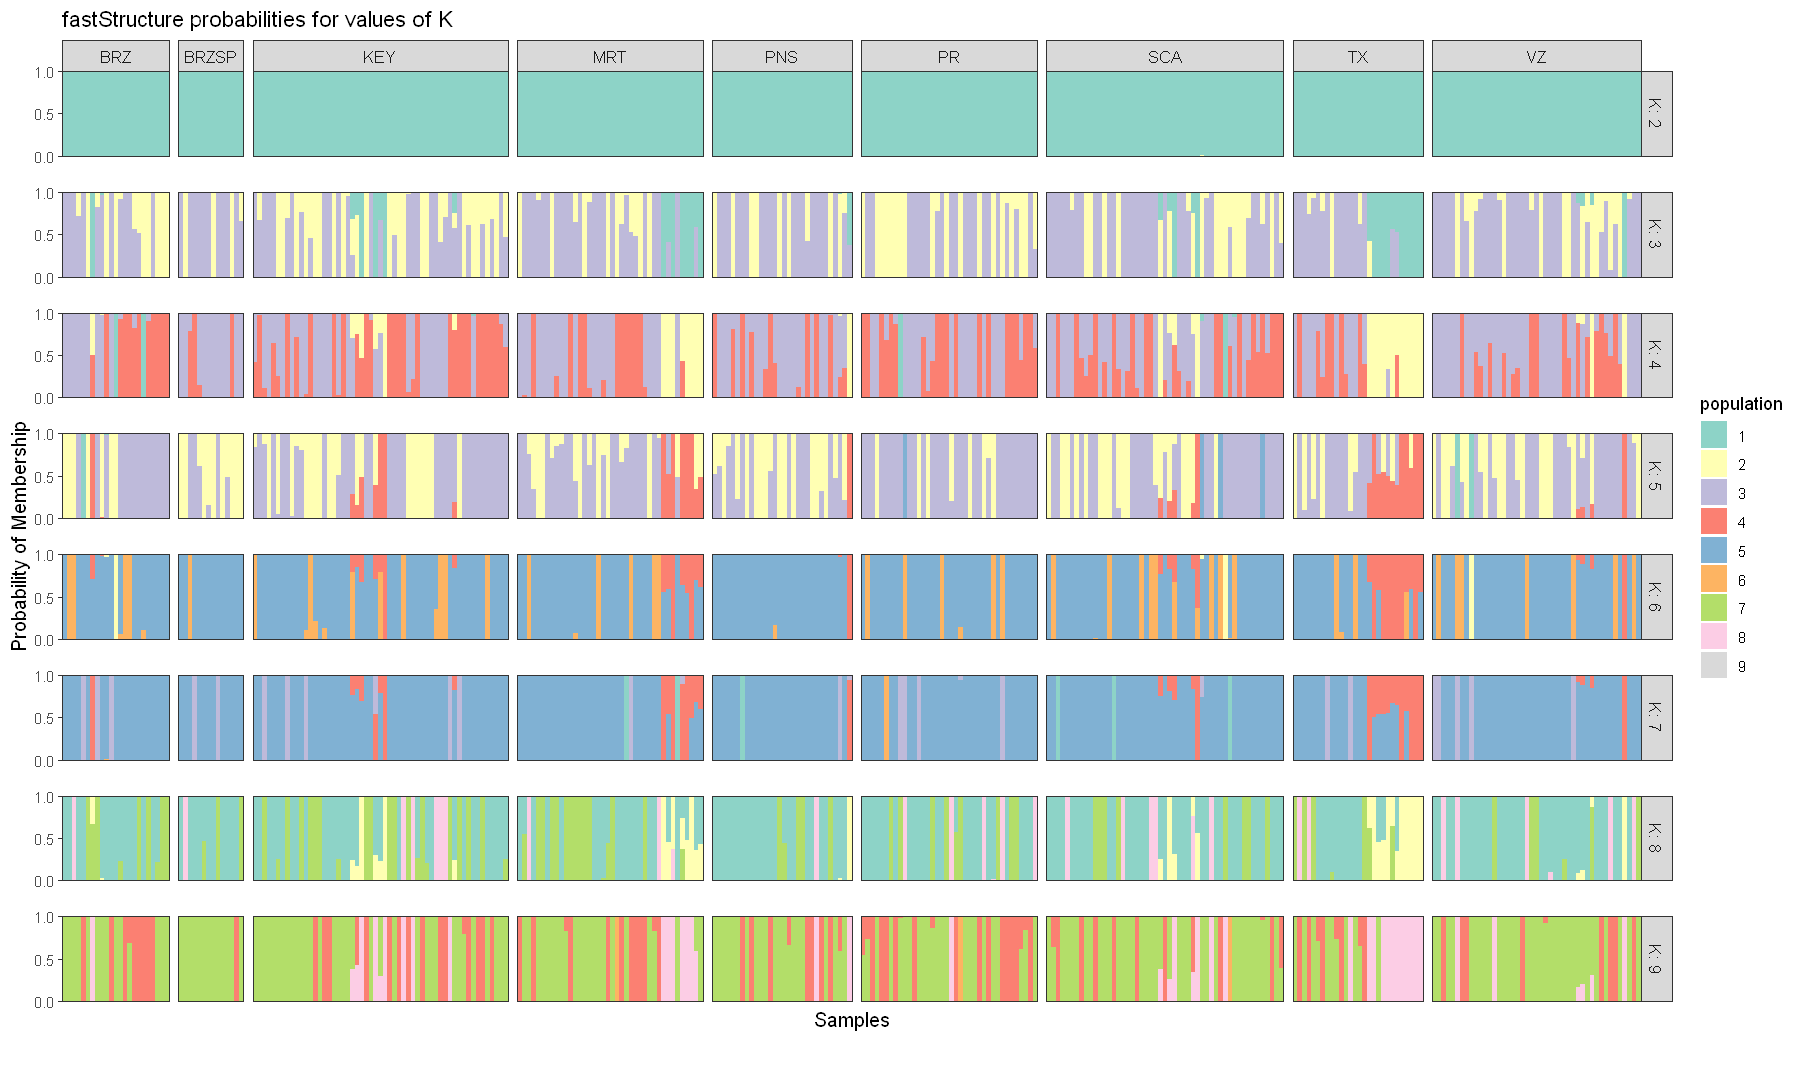

In [13]:
options(repr.plot.width=15, repr.plot.height=9)
ggplot(fstruct.res, aes(fill = population, y = value, x = sample)) +
    ylab("Probability of Membership") +
    geom_bar(position = "fill", stat = "identity", width = 1) +
    coord_cartesian(ylim = c(0, 1), expand = FALSE, clip = "off") +
    labs(title = "fastStructure probabilities for values of K") +
    xlab("Samples") +
    facet_grid(k~origin, scales = "free_x", space = "free_x") +
    scale_fill_manual(values = colors) +
    scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
    theme_bw() +
    theme(
        axis.title = element_text(size=12),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        strip.text = element_text(size = 10),
        panel.grid.major = element_blank(),
        panel.background = element_blank(),
        panel.grid.minor = element_blank(),
        panel.spacing.y = unit(1.5, "lines"),
        plot.margin = unit(c(5.5, 5.5, 30, 5.5), "pt")
    )

In [14]:
ggsave("faststructure.2-9.png", height = 7, width = 14, units = "in")

##  Plot by year

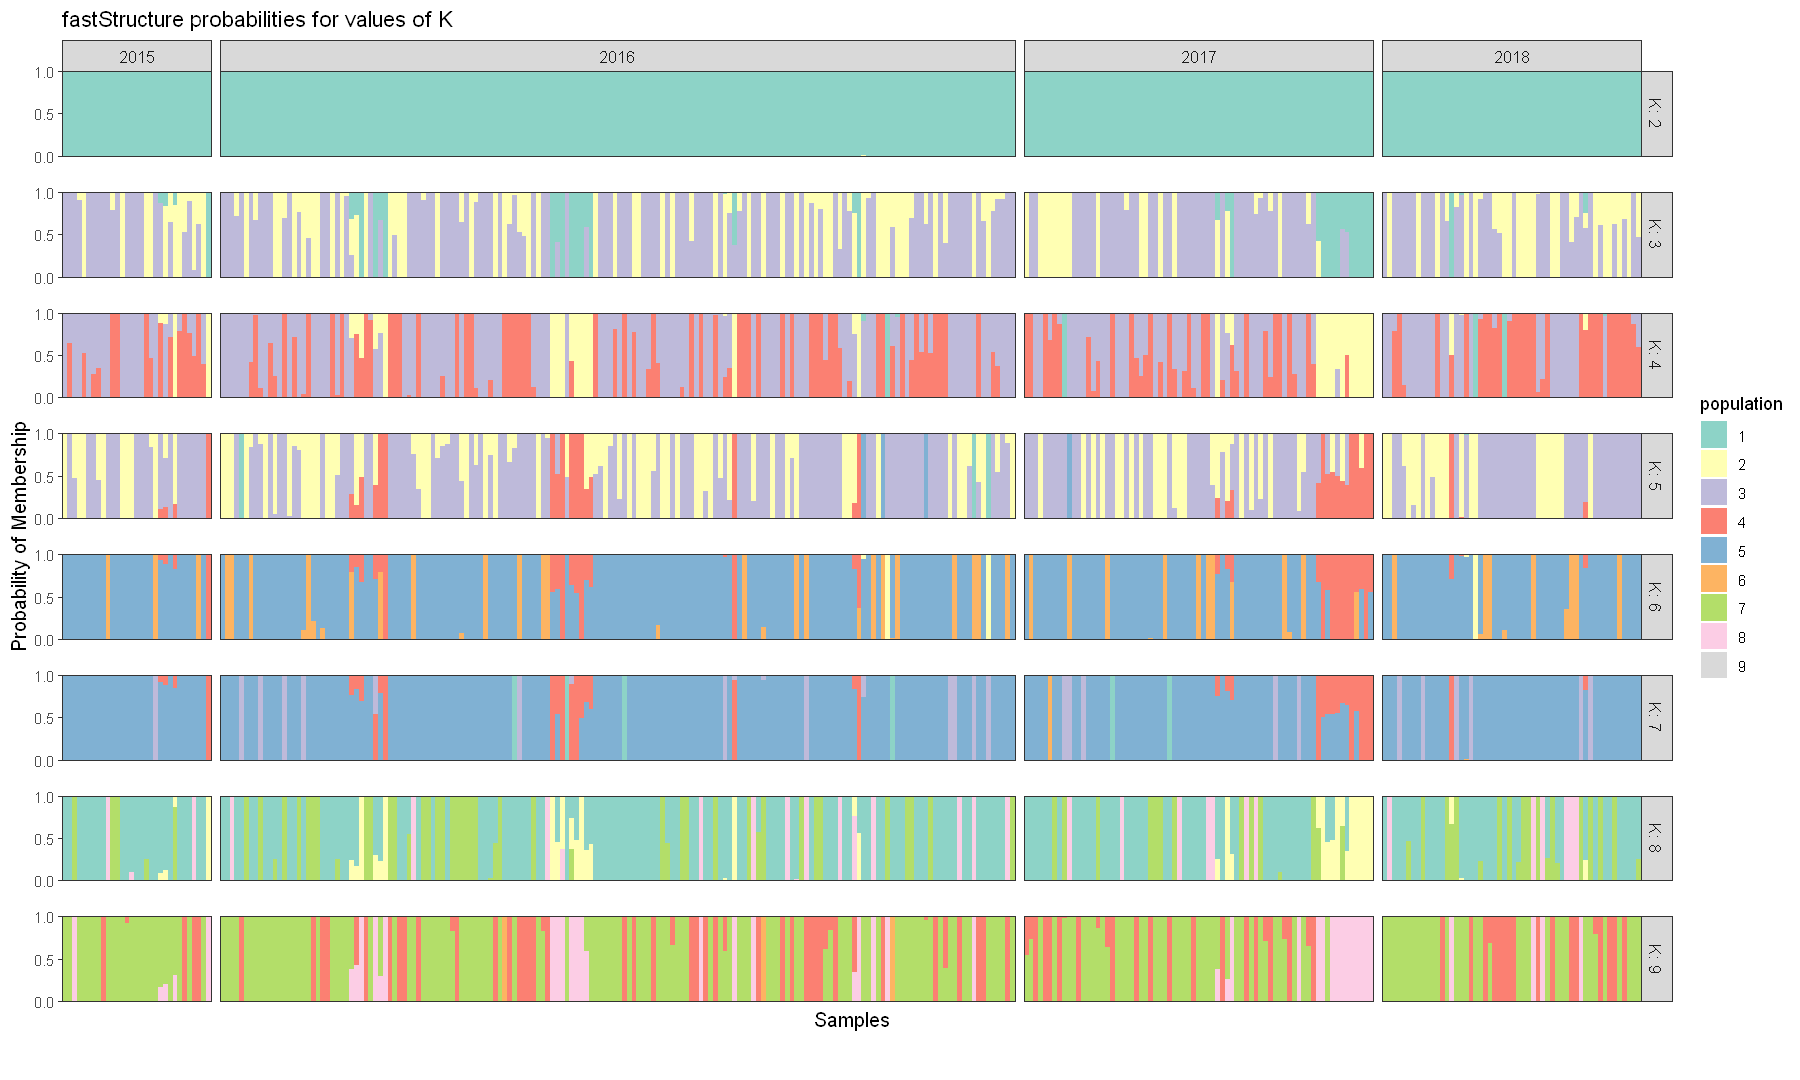

In [15]:
ggplot(fstruct.res, aes(fill = population, y = value, x = sample)) +
    ylab("Probability of Membership") +
    geom_bar(position = "fill", stat = "identity", width = 1) +
    coord_cartesian(ylim = c(0, 1), expand = FALSE, clip = "off") +
    labs(title = "fastStructure probabilities for values of K") +
    xlab("Samples") +
    facet_grid(k~year, scales = "free_x", space = "free_x") +
    scale_fill_manual(values = colors) +
    scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
    theme_bw() +
    theme(
        axis.title = element_text(size=12),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        strip.text = element_text(size = 10),
        panel.grid.major = element_blank(),
        panel.background = element_blank(),
        panel.grid.minor = element_blank(),
        panel.spacing.y = unit(1.5, "lines"),
        plot.margin = unit(c(5.5, 5.5, 30, 5.5), "pt")
    )

## Plot by location x year

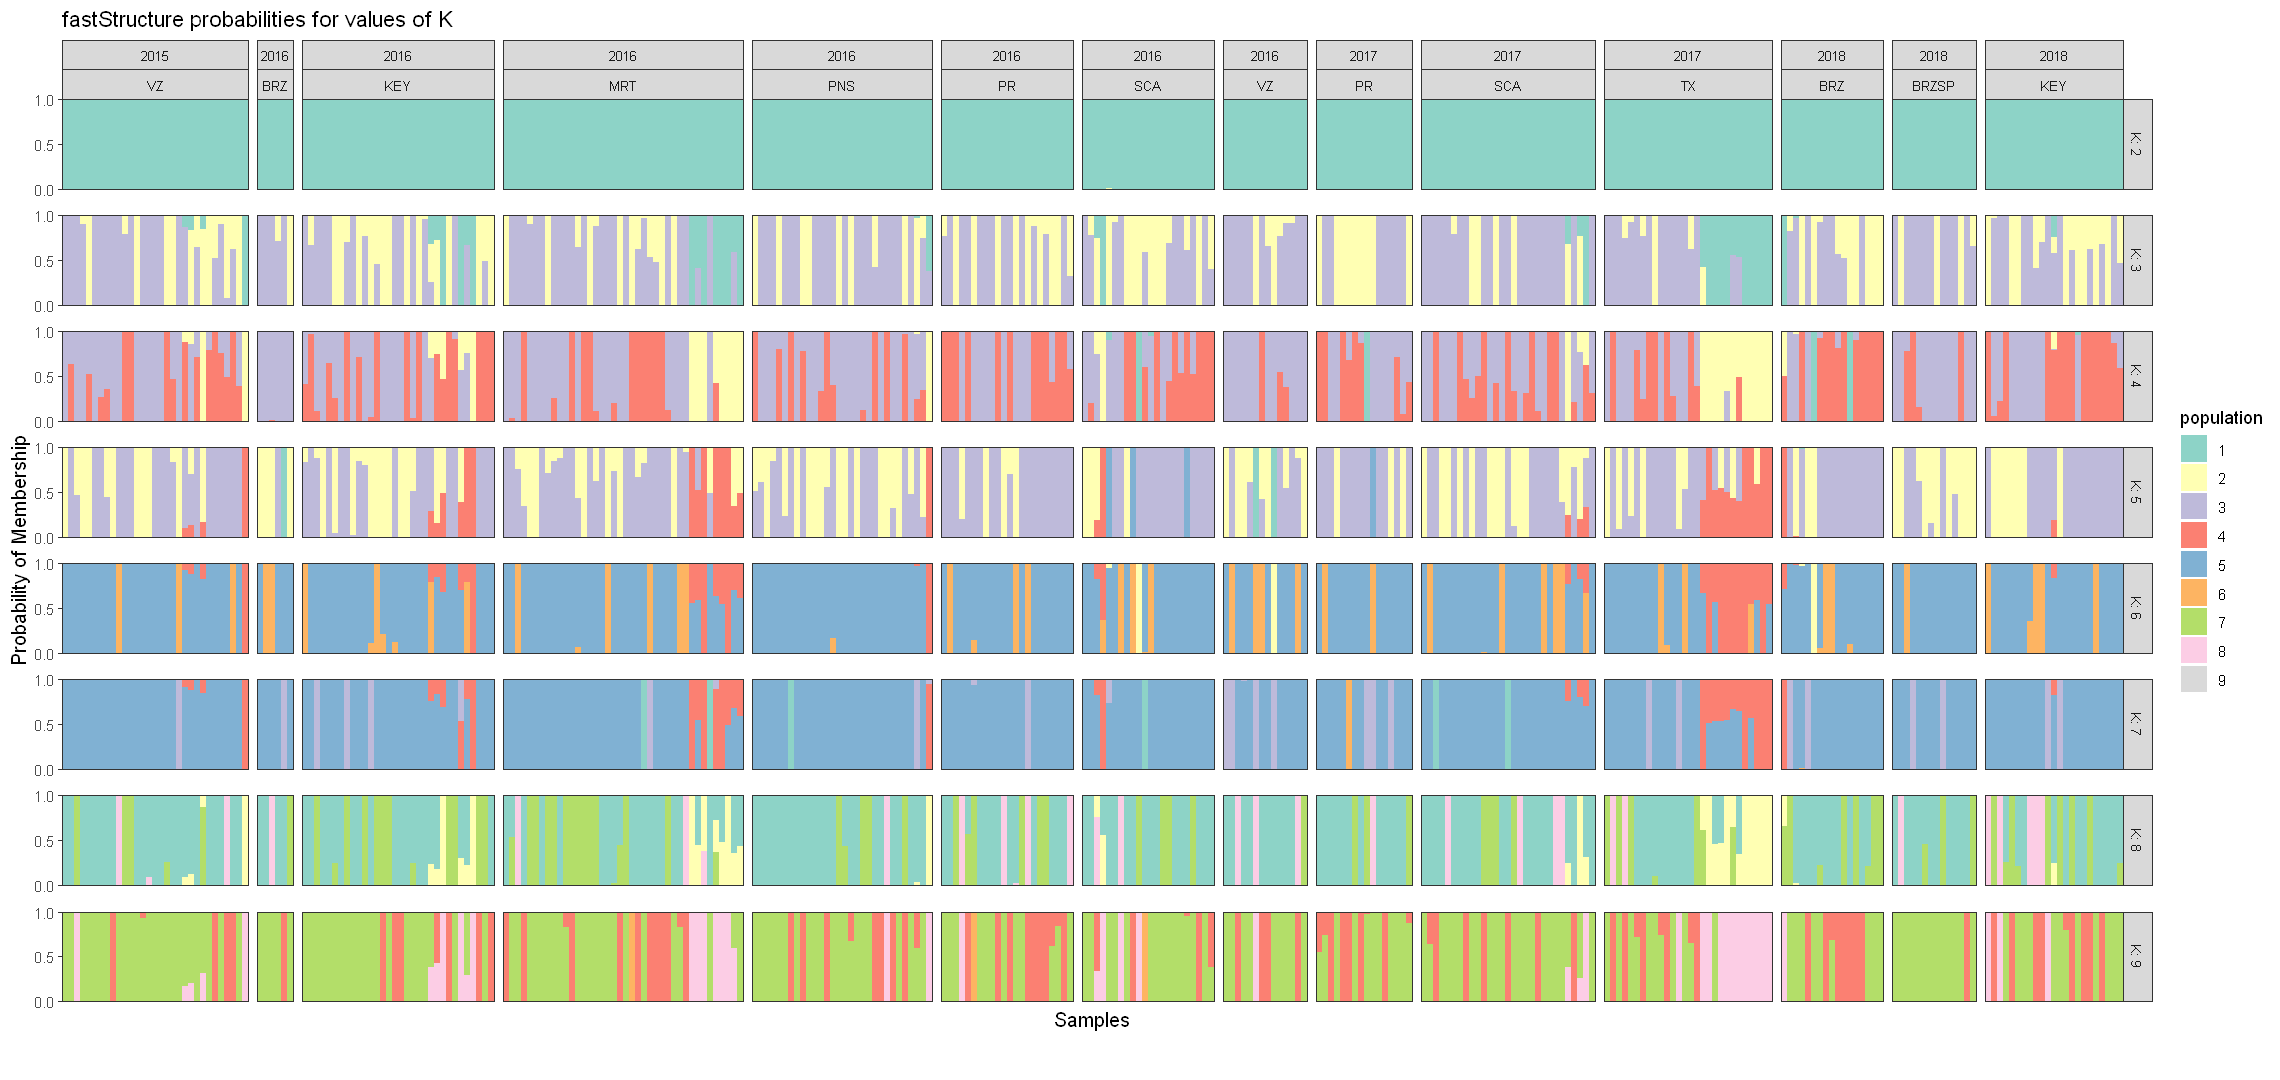

In [16]:
options(repr.plot.width=19, repr.plot.height=9)
ggplot(fstruct.res, aes(fill = population, y = value, x = sample)) +
    ylab("Probability of Membership") +
    geom_bar(position = "fill", stat = "identity", width = 1) +
    coord_cartesian(ylim = c(0, 1), expand = FALSE, clip = "off") +
    labs(title = "fastStructure probabilities for values of K") +
    xlab("Samples") +
    facet_grid(k~year*origin, scales = "free_x", space = "free_x") +
    scale_fill_manual(values = colors) +
    scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
    theme_bw() +
    theme(
        axis.title = element_text(size=12),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        strip.text = element_text(size = 8),
        panel.grid.major = element_blank(),
        panel.background = element_blank(),
        panel.grid.minor = element_blank(),
        panel.spacing.y = unit(1.1, "lines"),
        plot.margin = unit(c(5.5, 5.5, 30, 5.5), "pt")
    )

In [17]:
ggsave("faststructure.2-9.yearloc.png", height = 7, width = 16, units = "in")

## Plot by region

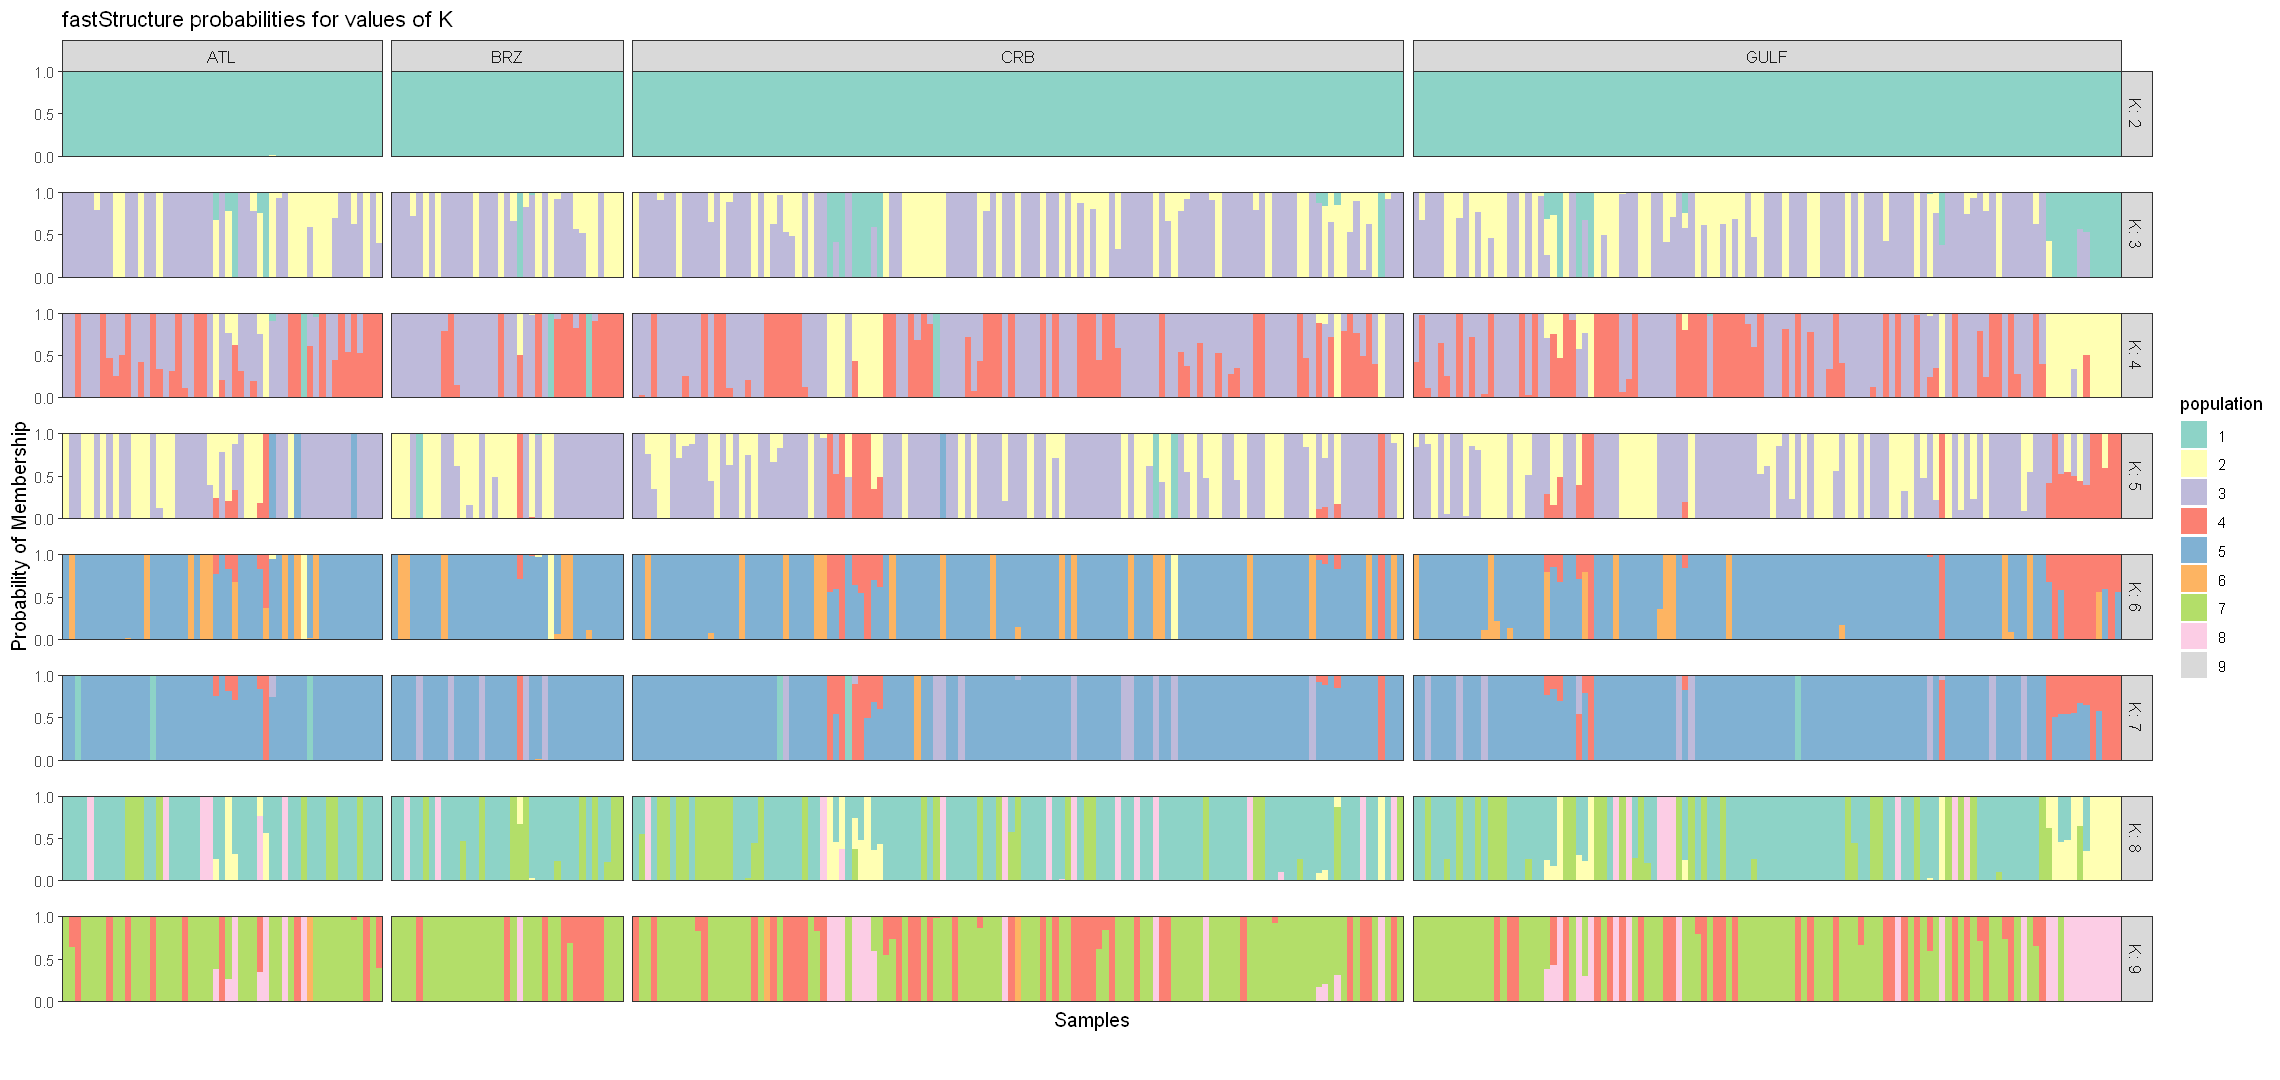

In [18]:
ggplot(fstruct.res, aes(fill = population, y = value, x = sample)) +
    ylab("Probability of Membership") +
    geom_bar(position = "fill", stat = "identity", width = 1) +
    coord_cartesian(ylim = c(0, 1), expand = FALSE, clip = "off") +
    labs(title = "fastStructure probabilities for values of K") +
    xlab("Samples") +
    facet_grid(k~region, scales = "free_x", space = "free_x") +
    scale_fill_manual(values = colors) +
    scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
    theme_bw() +
    theme(
        axis.title = element_text(size=12),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        strip.text = element_text(size = 10),
        panel.grid.major = element_blank(),
        panel.background = element_blank(),
        panel.grid.minor = element_blank(),
        panel.spacing.y = unit(1.5, "lines"),
        plot.margin = unit(c(5.5, 5.5, 30, 5.5), "pt")
    )

## Plot by year x region

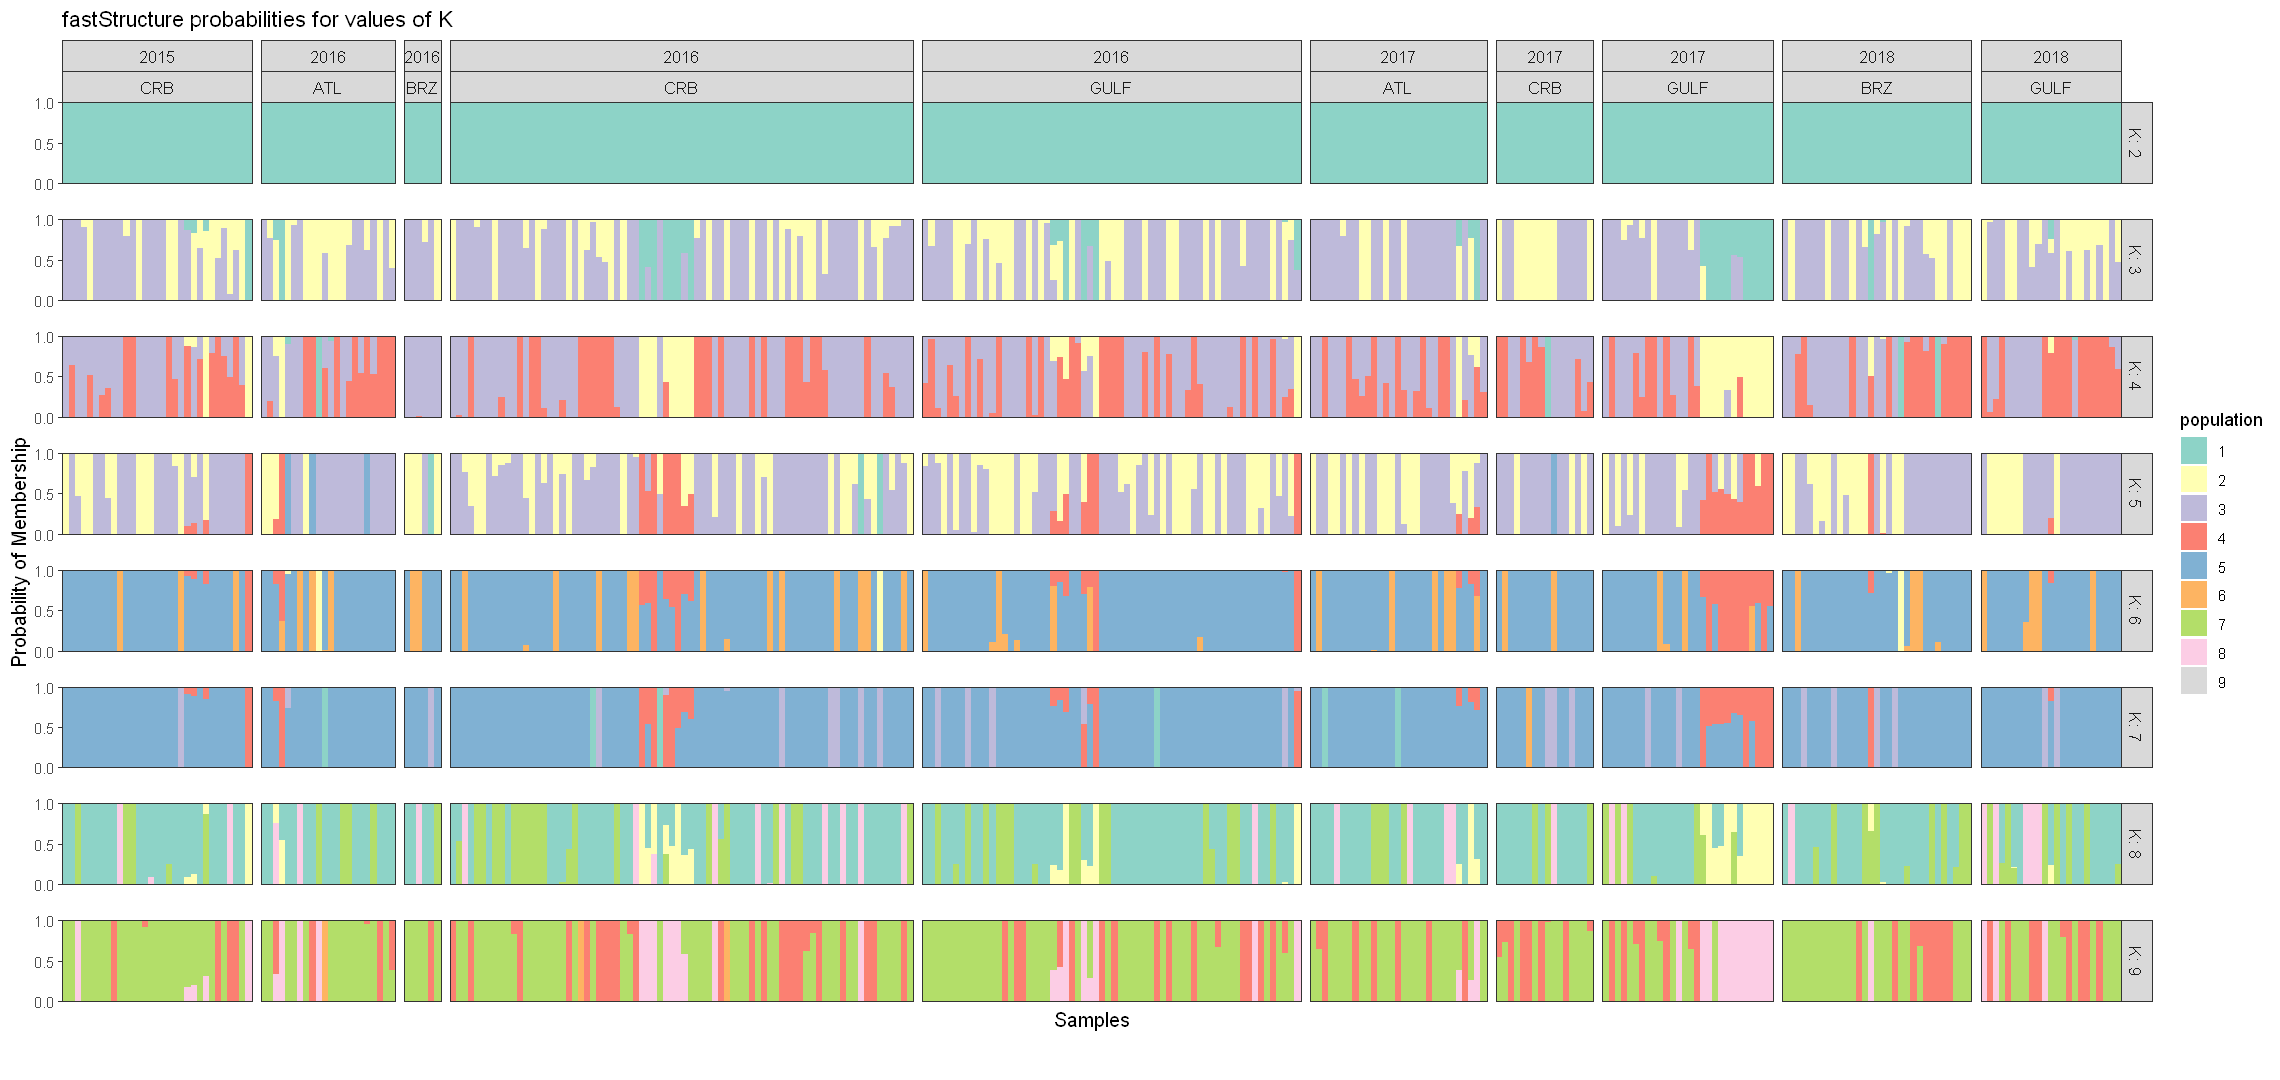

In [19]:
ggplot(fstruct.res, aes(fill = population, y = value, x = sample)) +
    ylab("Probability of Membership") +
    geom_bar(position = "fill", stat = "identity", width = 1) +
    coord_cartesian(ylim = c(0, 1), expand = FALSE, clip = "off") +
    labs(title = "fastStructure probabilities for values of K") +
    xlab("Samples") +
    facet_grid(k~year*region, scales = "free_x", space = "free_x") +
    scale_fill_manual(values = colors) +
    scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
    theme_bw() +
    theme(
        axis.title = element_text(size=12),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        strip.text = element_text(size = 10),
        panel.grid.major = element_blank(),
        panel.background = element_blank(),
        panel.grid.minor = element_blank(),
        panel.spacing.y = unit(1.5, "lines"),
        plot.margin = unit(c(5.5, 5.5, 30, 5.5), "pt")
    )